In [2]:
import numpy as np
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from utils import sample_rate, sample_space as t, plot_fft_simple, plot_fft

# Filtering the Sound

Filters help you have more control on the tone of the sound, They can attenuate or boost specific frequencies, allowing users to modify the timbre and sonic character of the synthesizers. In a lot of ways filter is one of the most identifiable parts of the sound. Depending on the filter's settings, even a single synth can change from sounding smooth and liquid to grinding and aggressive

In [3]:
freq = 100
sine_wave = np.sin(2 * np.pi * freq * t)
square_wave = signal.square(2 * np.pi * freq * t)
sawtooth_wave = signal.sawtooth(2 * np.pi * freq * t)

### Harmonics of the waveform! 

We know how these waveforms looks like but now let us use [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT) to see the frequency components (fundamental and harmonics) present in each wave.


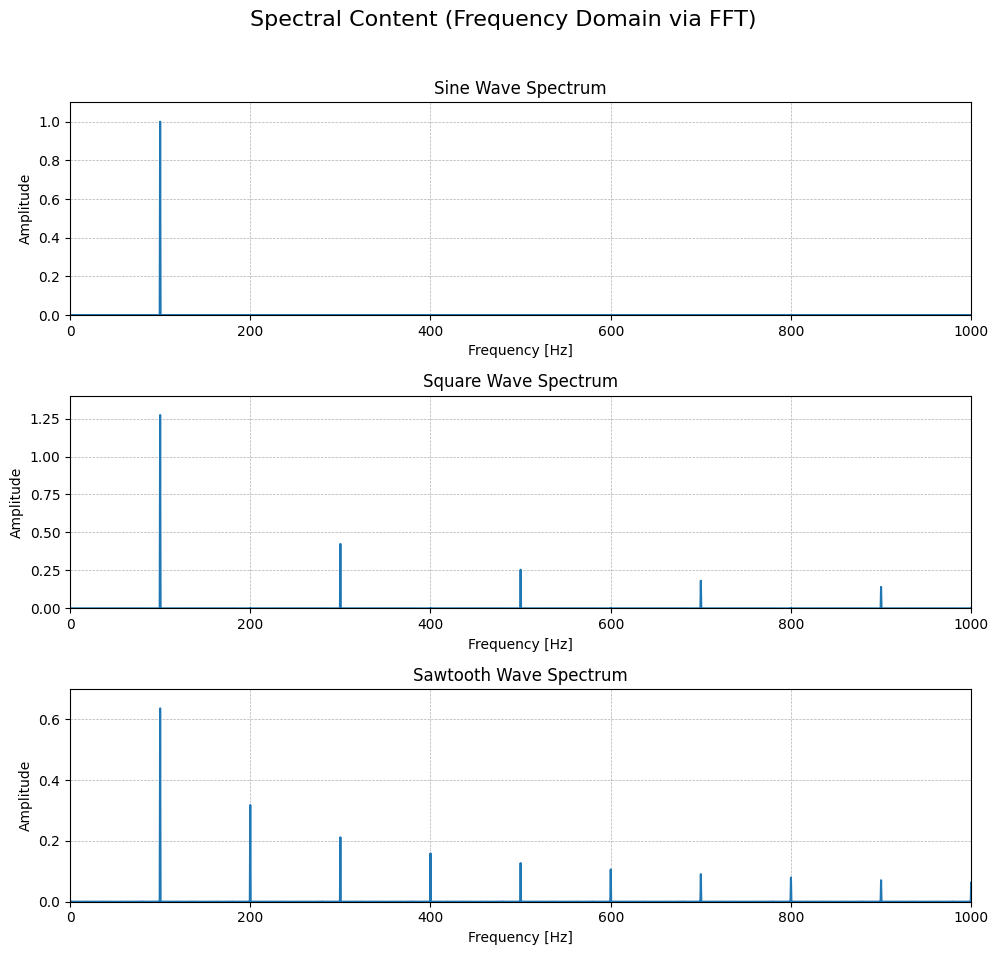

In [4]:
fig_fft, axs_fft = plt.subplots(3, 1, figsize=(10, 10), sharex=False)
fig_fft.suptitle('Spectral Content (Frequency Domain via FFT)', fontsize=16)

plot_fft(axs_fft[0], sine_wave, sample_rate, 'Sine Wave Spectrum')
plot_fft(axs_fft[1], square_wave, sample_rate, 'Square Wave Spectrum')
plot_fft(axs_fft[2], sawtooth_wave, sample_rate, 'Sawtooth Wave Spectrum')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### Observations from FFT
 *   **Sine:** Shows a single peak at the fundamental frequency (freq = 100 Hz).
 *   **Square:** Shows peaks at freq (100 Hz), 3*freq (300 Hz), 5*freq (500 Hz), etc. (odd harmonics).
 *   **Sawtooth:** Shows peaks at f0 (100 Hz), 2*freq (200 Hz), 3*freq (300 Hz), etc. (all harmonics).


**Filters** help you change the balance of frequencies present in a signal. They work by **attenuating** (reducing the amplitude or "volume" of) certain frequency ranges while allowing others to **pass** through relatively unchanged.

### The Low-Pass Filter (LPF)

Removing high frequencies while allowing lower frequencies to pass

- Cutoff Frequency: The frequency at which the filter starts significantly attenuating the signal
- Filter Order: Determines how sharply the filter cuts off frequencies above the cutoff


In music this filter is typically makes the sound appear "darker," "muffled" or "smoother" because the higher, brighter harmonics are reduced or eliminated.


In [5]:
ipd.Audio(sawtooth_wave, rate=sample_rate)

In [6]:
cutoff_hz = 800  # Cutoff harmonics above 800 Hz.
filter_order = 101 # Higher order = sharper cutoff
normalized_cutoff = cutoff_hz / (sample_rate/2) # Normalize the cutoff frequency to Nyquist

### FIR low-pass filter (Finite Impulse Response)

In [7]:
# Get the filter_coefficients
"""
This function computes the coefficients of a finite impulse response filter.
The filter will have linear phase
"""
filter_coefficients = signal.firwin(
    filter_order,
    normalized_cutoff,
    pass_zero='lowpass'
)
# Apply filter on filter_coefficients
"""
Zero-phase digital filtering.
It works by applying a filter to the input signal twice,
once in the forward direction and then in the reverse direction,
resulting in a filter with zero phase shift.
"""
filtered_signal = signal.filtfilt(filter_coefficients, 1.0, sawtooth_wave)

In [8]:
ipd.Audio(filtered_signal, rate=sample_rate)

### Plots Demonstrating Filters

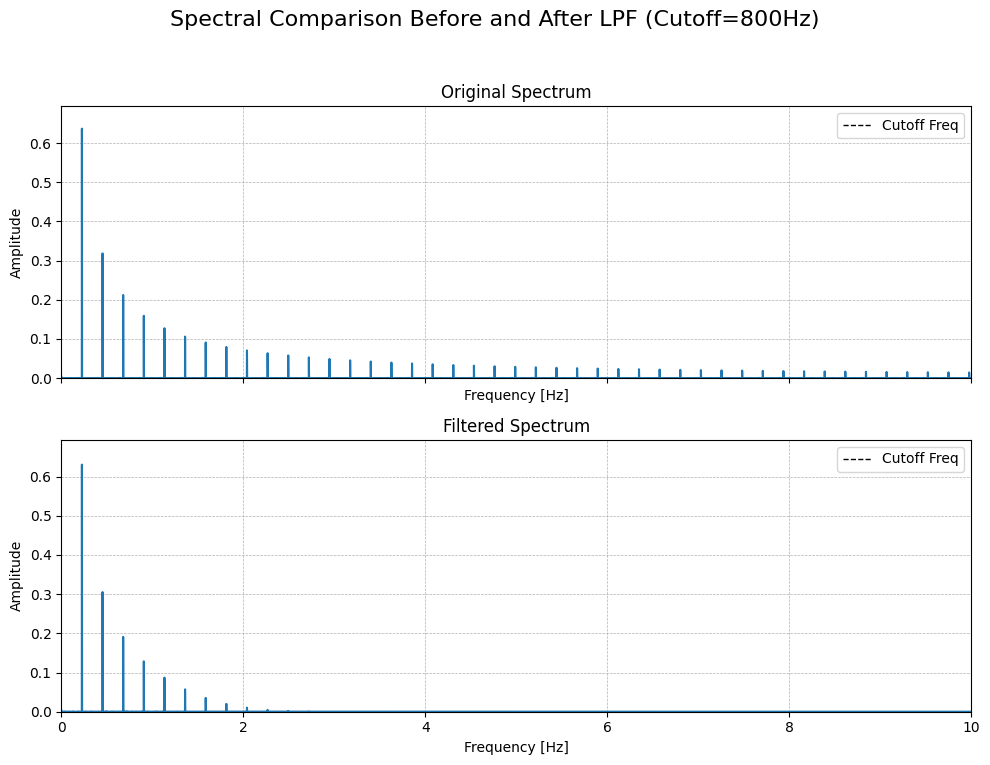

In [9]:
fig_fft_comp, axs_fft_comp = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
fig_fft_comp.suptitle(f'Spectral Comparison Before and After LPF (Cutoff={cutoff_hz}Hz)', fontsize=16)

plot_fft(axs_fft_comp[0], sawtooth_wave, freq, 'Original Spectrum', max_freq=10)
axs_fft_comp[0].axvline(cutoff_hz, color='black', linestyle='--', linewidth=1, label=f'Cutoff Freq')
axs_fft_comp[0].legend()

plot_fft(axs_fft_comp[1], filtered_signal, freq, 'Filtered Spectrum', max_freq=10)
axs_fft_comp[1].axvline(cutoff_hz, color='black', linestyle='--', linewidth=1, label=f'Cutoff Freq')
axs_fft_comp[1].legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

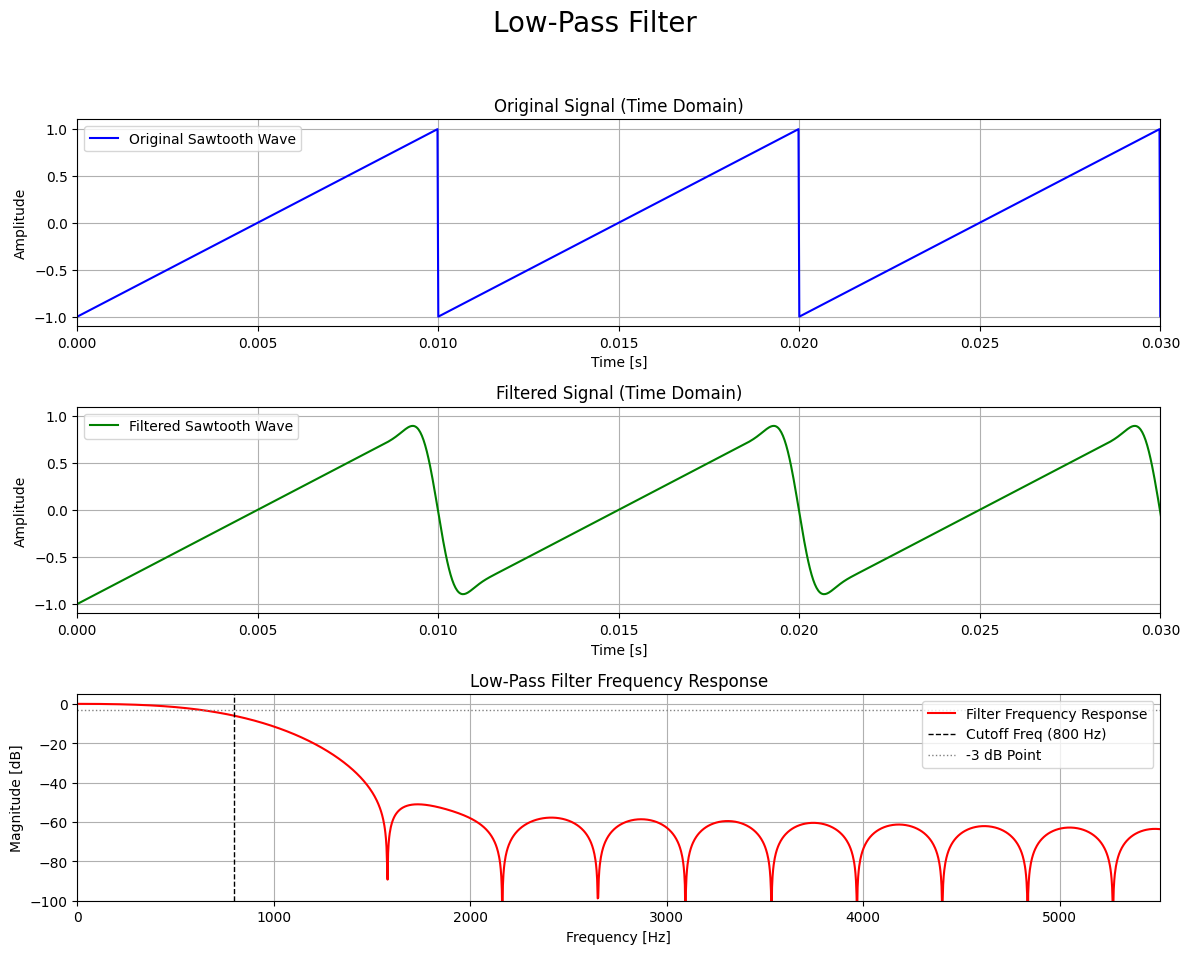

In [11]:
fig_lpf, axs_lpf = plt.subplots(3, 1, figsize=(12, 10))
fig_lpf.suptitle(f'Low-Pass Filter', fontsize=20)
signal_label = 'Sawtooth Wave'
# Plot 1: Original Signal (Time Domain)
axs_lpf[0].plot(t, sawtooth_wave, label=f'Original {signal_label}', color='blue')
axs_lpf[0].set_title('Original Signal (Time Domain)')
axs_lpf[0].set_xlabel('Time [s]')
axs_lpf[0].set_ylabel('Amplitude')
axs_lpf[0].legend()
axs_lpf[0].grid(True)
num_cycles_to_show = 3
axs_lpf[0].set_xlim(0, num_cycles_to_show / freq) # Zoom time

# Plot 2: Filtered Signal (Time Domain)
axs_lpf[1].plot(t, filtered_signal, label=f'Filtered {signal_label}', color='green')
axs_lpf[1].set_title('Filtered Signal (Time Domain)')
axs_lpf[1].set_xlabel('Time [s]')
axs_lpf[1].set_ylabel('Amplitude')
axs_lpf[1].legend()
axs_lpf[1].grid(True)
axs_lpf[1].set_xlim(0, num_cycles_to_show / freq) # Zoom time

# Plot 3: Frequency Response of the Filter
w, h = signal.freqz(filter_coefficients, worN=8000) # Calculate filter frequency response
freq_hz = (w / np.pi) * (0.5 * sample_rate) # Convert frequency axis to Hz

axs_lpf[2].plot(freq_hz, 20 * np.log10(abs(h)), label='Filter Frequency Response', color='red')
axs_lpf[2].axvline(cutoff_hz, color='black', linestyle='--', linewidth=1, label=f'Cutoff Freq ({cutoff_hz} Hz)')
axs_lpf[2].axhline(-3, color='grey', linestyle=':', linewidth=1, label='-3 dB Point')
axs_lpf[2].set_title('Low-Pass Filter Frequency Response')
axs_lpf[2].set_xlabel('Frequency [Hz]')
axs_lpf[2].set_ylabel('Magnitude [dB]')
axs_lpf[2].set_ylim(-100, 5) # Adjust y-axis to see attenuation
axs_lpf[2].set_xlim(0, sample_rate/8) # Zoom frequency axis for detail near cutoff
axs_lpf[2].legend()
axs_lpf[2].grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## HighPass Filter

Highpass filters remove material low in the audio spectrum, while allowing higher frequencies to pass

In [12]:
cutoff_hz_hpf = 500  # Cutoff frequency in Hz for the High-Pass Filter.
filter_order_hpf = 101 # Order of the FIR filter

normalized_cutoff_hpf = cutoff_hz_hpf / (0.5 * sample_rate)

In [13]:
filter_coe_hpf = signal.firwin(filter_order_hpf, normalized_cutoff_hpf, pass_zero='highpass')
filtered_signal_hpf = signal.filtfilt(filter_coe_hpf, 1.0, sawtooth_wave)

In [14]:
ipd.Audio(filtered_signal_hpf, rate=sample_rate)

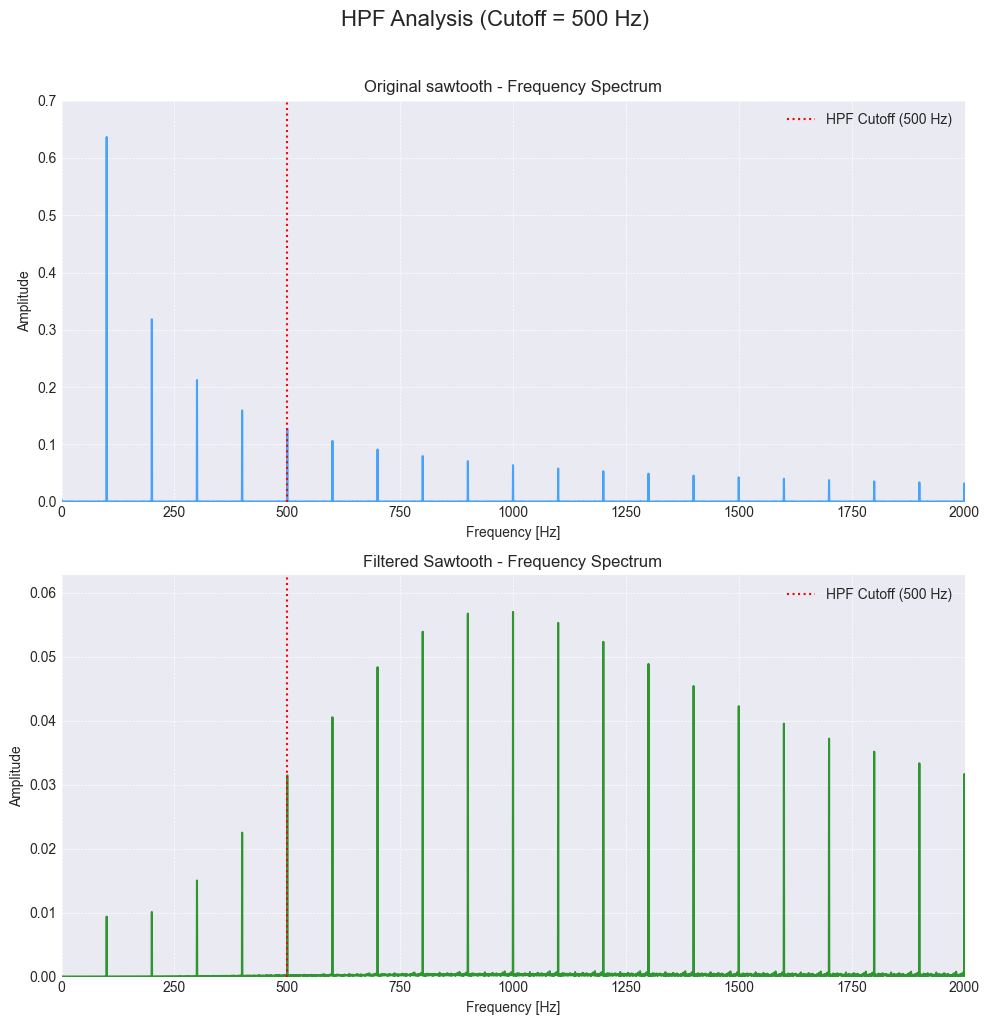

In [19]:
# --- Create Plots ---
nyquist_hpf = 0.5 * sample_rate
fig, axs = plt.subplots(2, 1, figsize=(10, 10)) # 3 rows, 1 column
fig.suptitle(f'HPF Analysis (Cutoff = {cutoff_hz_hpf} Hz)', fontsize=16, y=1.02)

# Maximum frequency to display on FFT plots (e.g., 20 times the fundamental)
max_fft_freq_display = freq * 20

# --- Plot 1: FFT of Original Signal ---
plot_fft_simple(axs[0], sawtooth_wave, sample_rate,
                f'Original sawtooth - Frequency Spectrum',
                max_fft_freq_display, line_color='dodgerblue')
axs[0].axvline(cutoff_hz_hpf, color='red', linestyle=':', linewidth=1.5, label=f'HPF Cutoff ({cutoff_hz_hpf} Hz)')
axs[0].legend(loc='upper right')

# --- Plot 2: FFT of Filtered Signal ---
plot_fft_simple(axs[1], filtered_signal_hpf, sample_rate,
                f'Filtered Sawtooth - Frequency Spectrum',
                max_fft_freq_display, line_color='green')
axs[1].axvline(cutoff_hz_hpf, color='red', linestyle=':', linewidth=1.5, label=f'HPF Cutoff ({cutoff_hz_hpf} Hz)')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

> **LPF and HPF are used quite a lot in Mixing of tracks, So a DJ might use a high-pass filter on one track to gradually reduce the bass and bring in the next track with a low-pass filter, creating a smooth transition between the two tracks**